In [21]:
from load_data import load_data
from one_hot_encode import one_hot_encode
from initialize_weights import initialize_weights
from train_model import train_model
from evaulation_model import predict
from evaulation_model import calculate_accuracy
from visualize_predictions import visualize_predictions

In [22]:
train_dir = "data/pokemon-dataset-1000/train"
val_dir = "data/pokemon-dataset-1000/val"
test_dir = "data/pokemon-dataset-1000/test"

In [23]:
image_size = (128, 128)
X_train, y_train, class_names = load_data(data_dir=test_dir, image_size=image_size)
X_val, y_val, _ = load_data(data_dir=val_dir, image_size=image_size)
X_test, y_test, _ = load_data(data_dir=test_dir, image_size=image_size)

Wczytywanie obrazu oraz normalizacja wartosci pixeli do [0, 1]. Tworzenie listy obrazów oraz odpowiadajacych im etykiet.

In [24]:
num_classes = len(class_names)
y_train = one_hot_encode(y_train, num_classes)
y_val = one_hot_encode(y_val, num_classes)
y_test = one_hot_encode(y_test, num_classes)

In [25]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [26]:
input_size = X_train_flat.shape[1]
hidden_size = 1024
output_size = num_classes
W1, b1, W2, b2 = initialize_weights(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [27]:
print(f"Liczba klas: {num_classes}")
print(f"Rozmiar zbioru treningowego: {X_train.shape}")
print(f"Rozmiar zbioru walidacyjnego: {X_val.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}")

Liczba klas: 1000
Rozmiar zbioru treningowego: (3239, 128, 128, 3)
Rozmiar zbioru walidacyjnego: (2379, 128, 128, 3)
Rozmiar zbioru testowego: (3239, 128, 128, 3)


In [ ]:
epochs = 700
learning_rate = 0.05
W1, b1, W2, b2 = train_model(X_train_flat, y_train, X_val_flat, y_val, W1, b1, W2, b2, epochs, learning_rate)

In [29]:
test_predictions = predict(X=X_test_flat, W1=W1, b1=b1, W2=W2, b2=b2)
test_accuracy = calculate_accuracy(test_predictions, y_test)

print(f"Dokładnośc na zbiorze testowym: {test_accuracy:.2%}")

Dokładnośc na zbiorze testowym: 94.66%


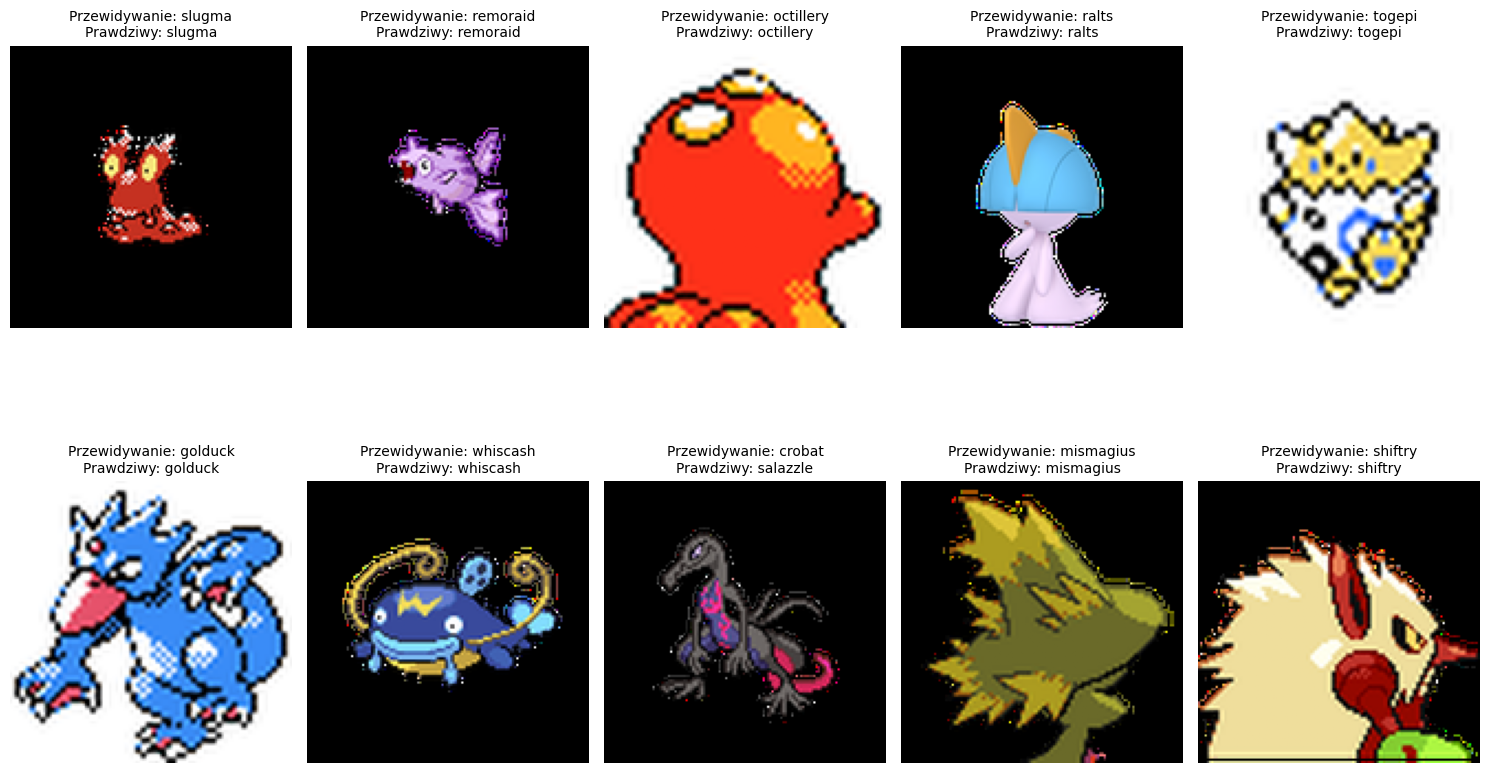

In [30]:
visualize_predictions(X_test, test_predictions, y_test, class_names)